In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv('/content/drive/My Drive/인공지능2020_2조/Vibration_Normal_1029/LoggedData01.csv', names=['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2'], usecols=[0,1,2,3,4,5])

In [7]:
df.head()

,X1,Y1,Z1,X2,Y2,Z2
0,0.020508,-0.019043,1.090332,0.008789,-0.002930,1.327637
1,0.028809,-0.023926,1.093018,0.030273,-0.013428,1.320557
2,0.055420,-0.060059,1.085205,0.019531,0.012207,1.333252
3,0.035889,-0.062012,1.085449,-0.029541,0.002197,1.313477
4,-0.006104,-0.029053,1.086670,0.004395,-0.014893,1.326904


In [8]:
df.X1

0         0.020508
1         0.028809
2         0.055420
3         0.035889
4        -0.006104
            ...   
180276    0.024658
180277    0.038086
180278   -0.034180
180279    0.005371
180280    0.049072
Name: X1, Length: 180281, dtype: float64

In [11]:
x_fft=np.fft.fft(df.X1)

In [20]:
x_fft.shape

(180281,)

In [17]:
x=x_fft.tolist()

In [21]:
len(x)

180281

In [22]:
df['X1_fft']=x

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


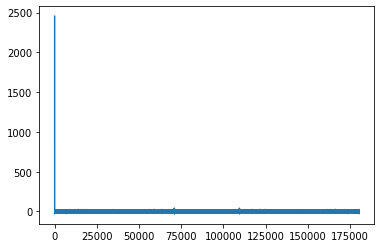

In [28]:
df.X1_fft.plot()

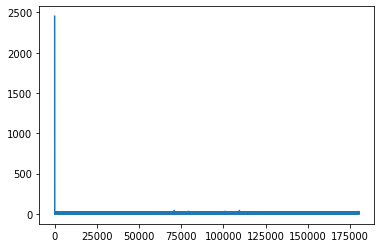

In [29]:
abs(df.X1_fft).plot()

In [31]:
import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = range(n)
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    
def main():
    x = df.X1
    n_predict = 100
    extrapolation = fourierExtrapolation(x, n_predict)
    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
    pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
    pl.legend()
    pl.show()


In [50]:
x = df.X1
n_predict = 100
n = x.size
n_harm = 10                     # number of harmonics in model
t = np.arange(0, n)
p = np.polyfit(t, x, 1)         # find linear trend in x
x_notrend = x - p[0] * t        # detrended x
x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
f = fft.fftfreq(n)              # frequencies
indexes = list(range(n))
# sort indexes by frequency, lower -> higher
indexes.sort(key = lambda i: np.absolute(f[i]))
 
t = np.arange(0, n + n_predict)
restored_sig = np.zeros(t.size)
for i in indexes[:1 + n_harm * 2]:
  ampli = np.absolute(x_freqdom[i]) / n   # amplitude
  phase = np.angle(x_freqdom[i])          # phase
  restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
print(restored_sig + p[0] * t)
extrapolation=restored_sig + p[0] * t

[0.01261909 0.01261904 0.01261899 ... 0.01328195 0.01328191 0.01328186]


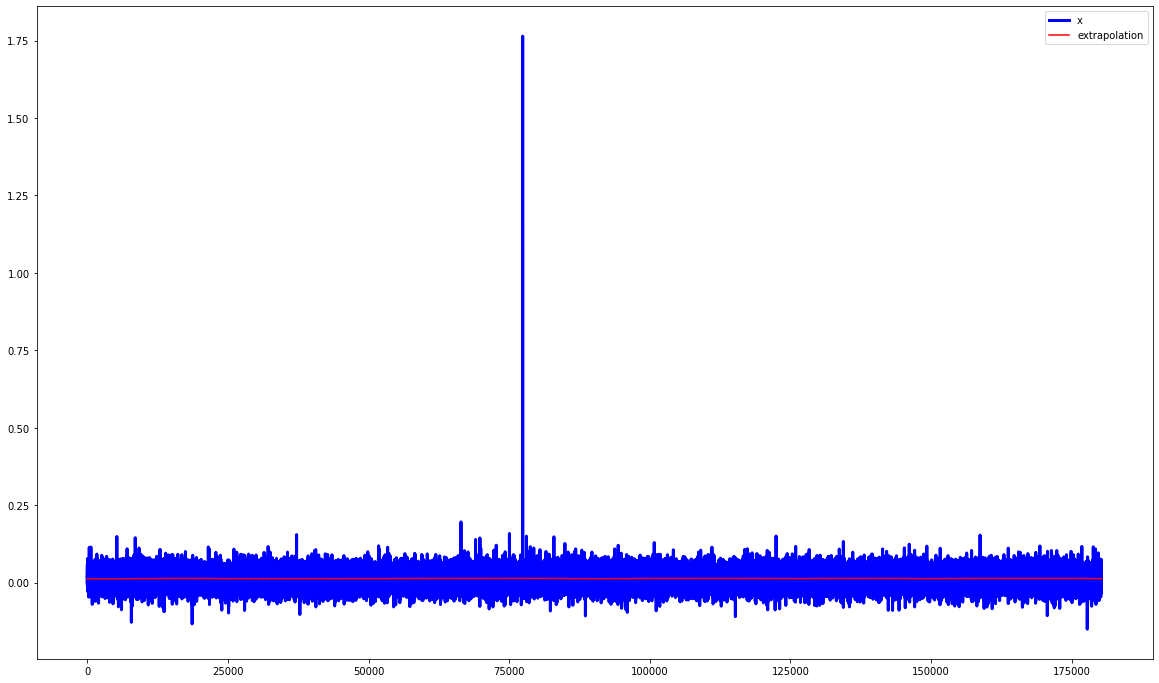

In [51]:
plt.figure(figsize=(20,12))
plt.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
plt.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')

plt.legend()
plt.show()

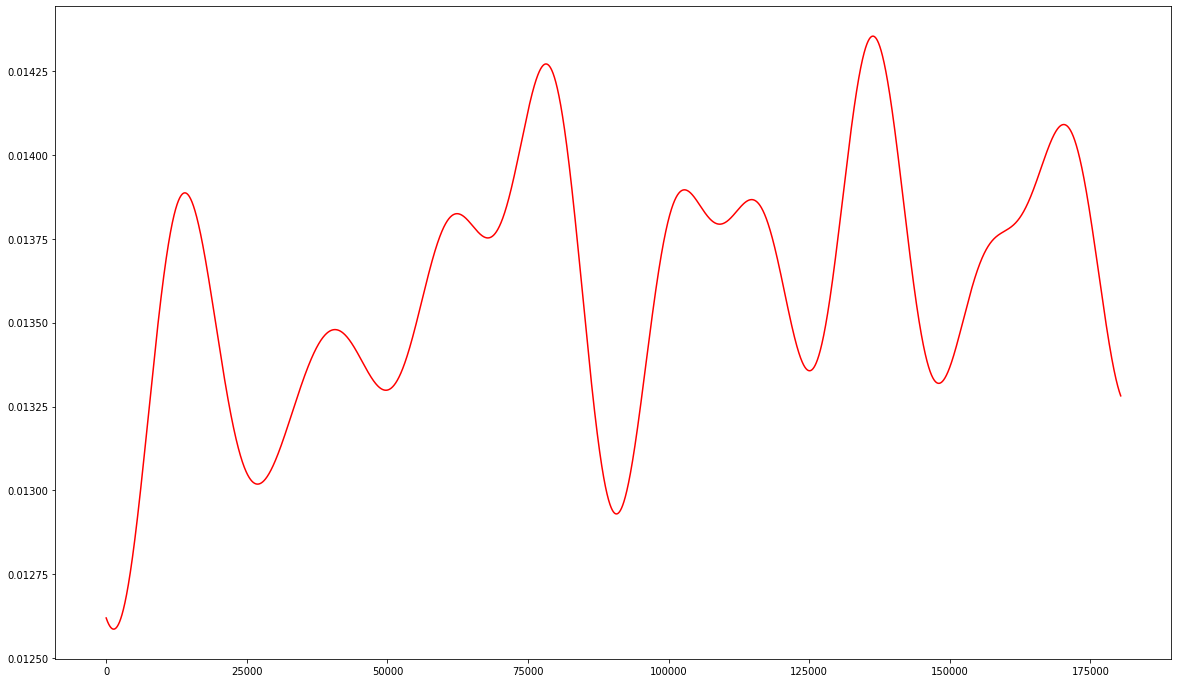

In [52]:
plt.figure(figsize=(20,12))
plt.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
plt.show()

In [53]:
import pywt

In [57]:
X_dwt1, X_dwt2=pywt.dwt(df.X1,'db1')

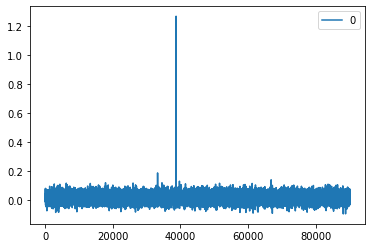

In [65]:
pd.DataFrame(X_dwt1.tolist()).plot()


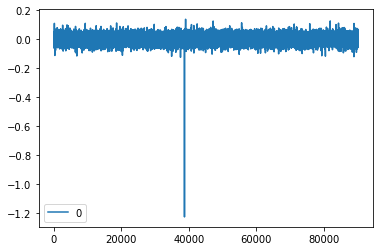

In [64]:
pd.DataFrame(X_dwt2.tolist()).plot()